In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [5]:
airline = pd.read_csv('EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
airline = airline.iloc[:,1:]
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
airline.shape

(3999, 11)

In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [13]:
airline_array = airline.values
airline_array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [14]:
#normalizing the numerical data
air_norm = scale(airline_array)
air_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Kmeans Clustering

In [15]:
# As we already have normalized data

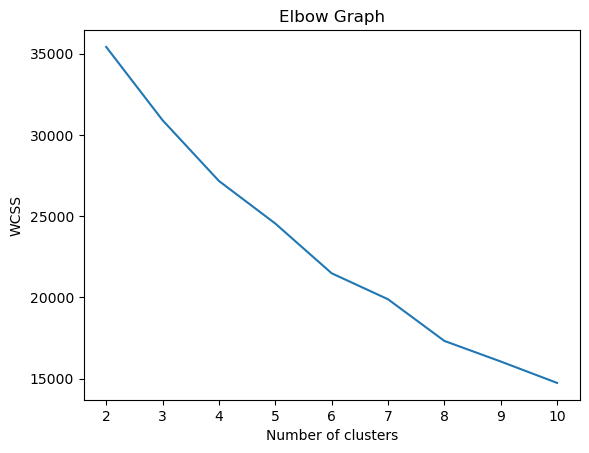

In [24]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(air_norm)
    wcss.append(kmeans.inertia_)
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(2,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

# Build cluster algorithms

In [26]:
kcluster = KMeans(3,random_state=30).fit(air_norm)
kcluster

KMeans(n_clusters=3, random_state=30)

In [27]:
kcluster.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [29]:
airline1 = airline.copy()
airline1['kcluster'] = kcluster.labels_
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kcluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [30]:
airline1['kcluster'].value_counts()

1    2578
0    1246
2     175
Name: kcluster, dtype: int64

# Hierarchical algorithm

In [31]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

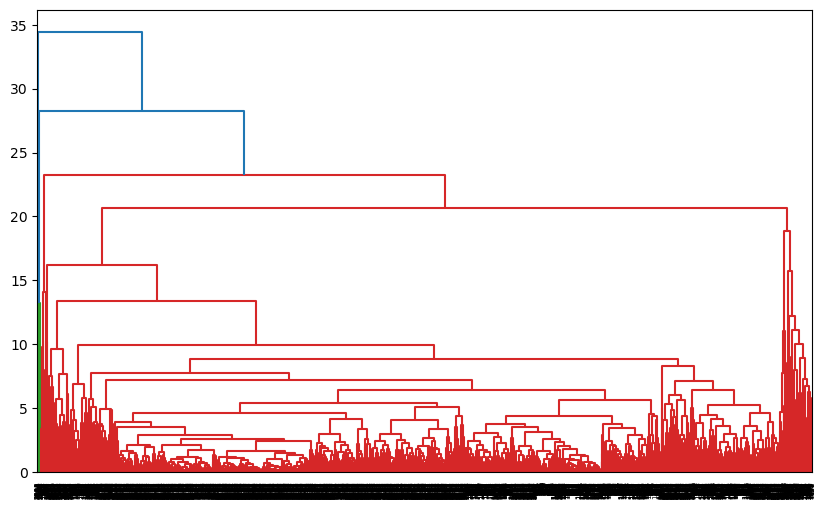

In [33]:
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(air_norm,'complete'))

In [34]:
# create clusters
hccluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hccluster

AgglomerativeClustering(n_clusters=3)

In [35]:
y = pd.DataFrame(hccluster.fit_predict(air_norm),columns=['hclust'])
y['hclust'].value_counts()

0    2489
1    1380
2     130
Name: hclust, dtype: int64

In [36]:
#adding cluster to dataset
airline1['hclust'] = hccluster.labels_
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kcluster,hclust
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


# db scan

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
dbscan = DBSCAN(eps = 2,min_samples=5)
dbscan.fit(air_norm)

DBSCAN(eps=2)

In [40]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
airline1['dbscn'] =dbscan.labels_

In [42]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kcluster,hclust,dbscn
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [43]:
airline1['dbscn'].value_counts()

 0    2453
 1    1330
-1     179
 2      16
 3       9
 4       7
 5       5
Name: dbscn, dtype: int64